In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv('bank.csv', sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
df.query('loan == "yes"')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
15,40,management,married,tertiary,no,194,no,yes,cellular,29,aug,189,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4508,42,admin.,married,unknown,no,642,yes,yes,unknown,16,may,509,2,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


In [11]:
df.query('loan == "no"')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no


In [14]:
df.query('loan == "yes" and y=="yes"')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
115,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
259,29,blue-collar,single,secondary,no,482,no,yes,cellular,10,jul,1097,3,-1,0,unknown,yes
271,24,blue-collar,single,secondary,no,174,yes,yes,cellular,18,may,487,1,-1,0,unknown,yes
289,34,admin.,married,tertiary,no,69,no,yes,cellular,4,aug,120,3,1,6,success,yes
298,38,entrepreneur,married,secondary,no,593,yes,yes,cellular,24,jul,1484,24,-1,0,unknown,yes
401,28,blue-collar,single,secondary,no,517,no,yes,cellular,8,jul,681,1,-1,0,unknown,yes
558,41,blue-collar,married,secondary,yes,720,no,yes,cellular,24,jul,651,1,-1,0,unknown,yes
630,30,management,single,tertiary,no,2,yes,yes,cellular,25,jul,1031,8,-1,0,unknown,yes
732,50,management,married,tertiary,no,3463,no,yes,cellular,28,oct,96,1,-1,0,unknown,yes
756,48,management,married,tertiary,no,1167,yes,yes,cellular,1,jun,264,1,-1,0,unknown,yes


In [15]:
len(df.query('loan == "yes" and y=="yes"'))

43

In [16]:
df.query('loan == "no" and y=="yes"')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,38,management,single,tertiary,no,623,no,no,cellular,28,jun,297,4,144,4,other,yes
4484,38,management,married,tertiary,no,3436,no,no,cellular,21,nov,663,4,-1,0,unknown,yes
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


In [17]:
len(df.query('loan == "no" and y=="yes"'))

478

In [18]:
len(df.query('loan == "yes" and y=="no"'))

648

In [19]:
len(df.query('loan == "no" and y=="no"'))

3352

In [22]:
a = len(df.query('loan == "yes" and y=="yes"'))
b = len(df.query('loan == "no" and y=="yes"'))
c = len(df.query('loan == "yes" and y=="no"'))
d = len(df.query('loan == "no" and y=="no"'))
a+b+c+d

4521

In [23]:
len(df["loan"])

4521

In [82]:
loan_and_y = a/(a+c)*100
noloan_and_y = b/(b+d)*100
loan_and_n = c/(a+c)*100
noloan_and_n = d/(b+d)*100


In [83]:
loan_and_y

6.2228654124457305

In [84]:
noloan_and_y

12.48041775456919

In [85]:
loan_and_n

93.77713458755427

In [86]:
noloan_and_n

87.51958224543081

In [88]:
new_loan_and_y = np.random.choice([1, 0], size = (a+c), p=[(loan_and_y/100), (1 - (loan_and_y/100))])

In [89]:
new_loan_and_y

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  42.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

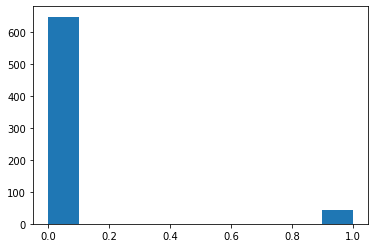

In [90]:
plt.hist(new_loan_and_y)

In [91]:
new_noloan_and_y = np.random.choice([1,0], size= (b+d), p = [(noloan_and_y/100), (1 - (noloan_and_y/100))])

In [92]:
new_noloan_and_y

array([0, 0, 0, ..., 0, 0, 0])

(array([3355.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

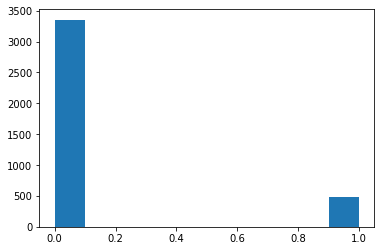

In [93]:
plt.hist(new_noloan_and_y)

In [94]:
new2_loan_and_y = np.random.binomial((a+c), loan_and_y/100, 10000) / (a+c)

In [95]:
new2_noloan_and_y = np.random.binomial((b+d), noloan_and_y/100, 10000) / (b+d)

In [96]:
new2_loan_and_y

array([0.06367583, 0.06367583, 0.08248915, ..., 0.0463097 , 0.03907381,
       0.05354559])

In [97]:
new2_noloan_and_y

array([0.13289817, 0.11697128, 0.12167102, ..., 0.12584856, 0.12454308,
       0.12741514])

In [98]:
len(new2_loan_and_y)

10000

In [99]:
len(new2_noloan_and_y)

10000

In [100]:
p_diffs = new2_loan_and_y - new2_noloan_and_y

In [101]:
p_diffs

array([-0.06922234, -0.05329545, -0.03918187, ..., -0.07953887,
       -0.08546927, -0.07386956])

In [102]:
p_diffs.mean()

-0.06259524989325646

In [103]:
ab_data_diff = (loan_and_y - noloan_and_y) / 100 

In [104]:
ab_data_diff

-0.0625755234212346

In [105]:
(p_diffs > ab_data_diff).mean() * 100

49.059999999999995

In [106]:
(p_diffs < ab_data_diff).mean() * 100

50.79

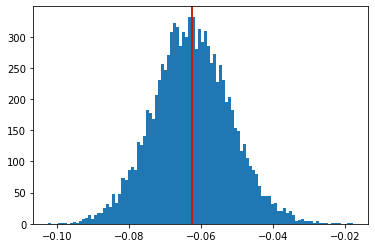

In [107]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
high = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=high, color='r')

In [108]:
import statsmodels.api as sm

In [109]:
sm.stats.proportions_ztest([b, a], [(b+d), (a+c)], alternative='larger')

(4.741451339904052, 1.0609631289909802e-06)